# Mathematical Aspects of Machine Learning: Exercise Sheet 1
by Henrik Narvaez, Marvin Rominger, Johannes von Lindheim und Luzie Helfmann


#  Exercise 1 (a) <br> 
We created $100$ random data points in $2$ dimensions. This is just one example to see how the algorithm works before using it on differet $l$ and $n$. <br>
A label $+1$ (set A) or $-1$ (set B) is assigned to each data point. The points are linearly seperable (and thus also absolutely linearly seperable as we have a finite training set) because they were split into two groups by creating a random vector $w$ such that $$ w^Tx\geq \theta$$ or $$w^Tx<\theta$$ for all $x$ in the training data.


In [1]:
import numpy as np, matplotlib.pyplot as plt
from pandas import DataFrame

In [2]:
l=10
#dimension 
n=2 

trainingdata=np.random.rand(l,n+1) #random data points in (0,1)^n
trainingdata[:,-1]=np.ones((1,l)) #n+1'th dimension to account for theta

#assign labels to training data such that they are linearly seperable           
wrandom=np.random.rand(n)
datalabels=np.zeros(l)
theta=np.dot(wrandom,trainingdata[1,:n])
for i in range(l):
  if np.dot(wrandom,trainingdata[i,:n])>=theta:
      datalabels[i]=1
  else:
      datalabels[i]=-1

In [3]:
print trainingdata; print datalabels

[[ 0.11698341  0.5534786   1.        ]
 [ 0.20734128  0.76631007  1.        ]
 [ 0.40597427  0.56612275  1.        ]
 [ 0.86286997  0.09135891  1.        ]
 [ 0.52940763  0.75070689  1.        ]
 [ 0.19520267  0.17493323  1.        ]
 [ 0.58117242  0.64372826  1.        ]
 [ 0.92116046  0.71755257  1.        ]
 [ 0.85353089  0.13303326  1.        ]
 [ 0.91842537  0.73445809  1.        ]]
[-1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]


To plot the data in the example below, the training data points with label $+1$ are shown as red circles, the points with label $-1$ are shown as blue stars. And the two sets are seperated by the line wrandom (with the Perceptron algorithm we want to find such a seperating line).  

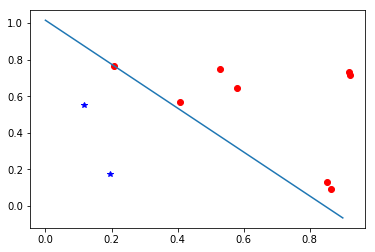

In [4]:
x=np.arange(0,1,0.1)
y=np.zeros(l)
for i in range(10):
    y[i]=(theta-wrandom[0]*x[i])/wrandom[1]

index1=[i for i,e in enumerate(datalabels) if e==1]
indexmin1=[i for i,d in enumerate(datalabels) if d==-1]
plt.plot(trainingdata[index1,0],trainingdata[index1,1],'ro')
plt.plot(trainingdata[indexmin1,0],trainingdata[indexmin1,1],'b*')
plt.plot(x,y)
plt.show()

In the Perceptron algorithm we iterate and cycle through all the training data points until we find a $w_t$ such that all points in one set are on one side of the hyperplane and all the others on the other side. As a maximum number of iterations we have set $1000$ and the stopping criteria is that the algorithm has cycled through all training points without having to adjust weight vector.

In [5]:
#perceptron algorithm
t=0
w=np.random.rand(n+1) #n+1 dimensional to account for theta 
cycle=0 #to keep track of whether we cycled through all training data points
     
    
for t in range(1000):
    for i in range(l):
        if datalabels[i]==np.sign(np.dot(w,trainingdata[i,:])):
            cycle+=1
        elif datalabels[i]==1:
            w+=trainingdata[i,:]
            cycle=0
            break
        else:
            w-=trainingdata[i,:]
            cycle=0
            break      
    if cycle==l: #stopping criteria
        break
    


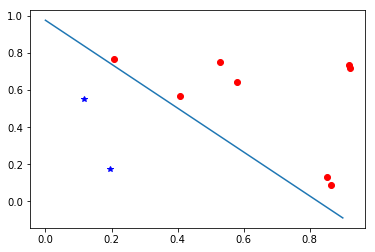

In [ ]:
x=np.arange(0,1,0.1)
for i in range(10):
    y[i]=(-w[2]-w[0]*x[i])/w[1]

index1=[i for i,e in enumerate(datalabels) if e==1]
indexmin1=[i for i,d in enumerate(datalabels) if d==-1]
plt.plot(trainingdata[index1,0],trainingdata[index1,1],'ro')
plt.plot(trainingdata[indexmin1,0],trainingdata[indexmin1,1],'b*')
plt.plot(x,y)
plt.show()

Now we can test our algorithm on different $n$ (dimensions) and $l$ (number of training data). And see how and compare how the algorithm behaves in terms of number of iterations.

In [ ]:
#setting parameters
maxn=10 #maximum number of dimensions
maxl=100 #maximum number of training elements
repetitions=100 #number of repetitions to estimate the number of iterations for certain n and l

iterations=np.zeros((3,maxl -1,maxn -1))
iterations[0,:,:]=np.array([range(2,maxn+1) for k in range(1,maxl)])
iterations[1,:,:]=np.array([range(2,maxl+1) for k in range(1,maxn)]).T
     
for n in range(2,maxn + 1): #dimension 
    for l in range(2,maxl + 1): #size of training data set
        tmean=0
        for k in range(repetitions):
            trainingdata=np.random.rand(l,n+1) #random data points
            trainingdata[:,-1]=np.ones((1,l)) #n+1 dimensional to account for theta
            
            #create random linearly seperable training data             
            wrandom=np.random.rand(n)
            datalabels=np.zeros(l)
            theta=np.dot(wrandom,trainingdata[1,:n])
            for i in range(l):
              if np.dot(wrandom,trainingdata[i,:n])>=theta:
                  datalabels[i]=1
              else:
                  datalabels[i]=-1
                 
            #linearly seperable test data of dimension n
            #even absolutely linearly separable as the two sets A and B are finite
            
            
            #perceptron algorithm
            w=np.random.rand(n+1) #n+1 dimensional to account for theta 
            cycle=0 #to keep track of whether we cycled through all training data points
                 
                
            for t in range(1,500):
                for i in range(l):
                    if datalabels[i]==np.sign(np.dot(w,trainingdata[i,:])):
                    #sign can also be 0 !!!
                        cycle+=1
                    elif datalabels[i]==1:
                        w+=trainingdata[i,:]
                        cycle=0
                        break
                    else:
                        w-=trainingdata[i,:]
                        cycle=0
                        break      
                if cycle==l: #stopping criteria
                    tmean+=1./repetitions*t
                    break
                    
        iterations[2,l-2,n-2]=tmean 
        



In [ ]:
for i in range(maxl-1):     
    plt.plot(iterations[0,i,:],iterations[2,i,:],'ro')
    plt.title('training data points l = '+str(i+2))
    plt.ylabel('average number of iterations' + str(repetitions) +  ' repetions')
    plt.xlabel('dimension n')
    plt.show()
for i in range(maxn-1):     
    plt.plot(iterations[1,:,i],iterations[2,:,i],'bo')
    plt.ylabel('average number of iterations ' + str(repetitions) +  ' repetions')
    plt.title('dimension n = '+ str(i+2))
    plt.xlabel('number of training data points l')
    plt.show()

So in conclusion, for a fixed number of training data points, the number of iterations decreases with increasing dimension (seems to fall exponentially); and for a fixed dimension of the space, the number of iterations seems to increase (linearly) with increasing number of data points. 

# Exercise 1 (b) <br>
Next we want to find an example for which the algorithm takes very very long to find the weight vector which seperates the two sets A and B. 

In [ ]:
l=5 
n=5 
trainingdata=np.array([[-0.93652338, -0.90652662, -0.9842292 , -0.91720455, -0.94420967,
         1.        ],
       [ 1.01724911,  1.04598597,  1.04287103,  1.05005195,  1.01763736,
         1.        ],
       [ 1.04302792,  1.01471629,  1.02017942,  1.04279241,  1.04448992,
         1.        ],
       [ 1.07343644,  1.03190436,  1.05094974,  1.0268245 ,  1.0763322 ,
         1.        ],
       [ 1.06358414,  1.06779813,  1.02946642,  1.07718681,  1.09281483,
         1.        ]])
   
datalabels=np.array([-1.,  1., -1.,  1.,  1.])

#plotting the points in 2 dimensions to understand the difficulty of finding a hyperplane
index1=[i for i,e in enumerate(datalabels) if e==1]
indexmin1=[i for i,d in enumerate(datalabels) if d==-1]
plt.scatter(trainingdata[index1,0],trainingdata[index1,1],c='r')
plt.scatter(trainingdata[indexmin1,0],trainingdata[indexmin1,1],c='b')
print('The plot below shows the vectors in the first two dimensions, the different colours stand for the different labels +1 and -1.')
plt.show()

The reason the perceptron algorithm will take so many iterations when seperating the two sets A and B is that, the data points are very close to another and the distance from the points to the hyperplane will be very small. Also the vectors all point along nearly the same direction, so $w_t$ changes its direction only very slowly.

In [ ]:
               
#perceptron algorithm
t=0
w=np.random.rand(n+1) #n+1 dimensional to account for theta 
cycle=0 #to keep track of whether we cycled through all training data points
     
    
for t in range(10000):
    for i in range(l):
        if datalabels[i]==np.sign(np.dot(w,trainingdata[i,:])):
        #sign can also be 0 !!!
            cycle+=1
        elif datalabels[i]==1:
            w+=trainingdata[i,:]
            cycle=0
            break
        else:
            w-=trainingdata[i,:]
            cycle=0
            break      
    if cycle==l: #stopping criteria
        break

print('The number of iterations to find the hyperplane seperating the two sets is ' +str(t) +'.')

# Exercise 1 (c) <br>
The task was to produce an estimate for the maximum number of vectors one can pick at random and which are supposed to be in the same set (say A) such that all points can be seperated by a hyperplane through the origin (i.e. $\theta=0$).<br>
We estimated (for different values of dimension $n$) for each $l$ (number of training data points) the proportion of runs such that a hyperplane (as described above) exists.

In [ ]:
maxn=10
maxl=10
repetitions=100

behaviour=np.zeros((3,maxl-1,maxn-1))
behaviour[0,:,:]=np.array([np.arange(2,maxn + 1,1 ) for k in range(maxl-1)])
behaviour[1,:,:]=np.array([np.arange(2,maxl + 1,1) for k in range(maxn-1)]).T

        
for n in np.arange(2,maxn+1,1 ): #dimension 
    for l in np.arange(2,maxl + 1,1): #size of training data set        
        propsep=0
        for k in range(repetitions):
            trainingdata=np.random.uniform(-1,1,(l,n)) #random data points
            datalabels=np.ones(l)
            
            #perceptron algorithm
            w=np.random.rand(n) #n+1 dimensional to account for theta 
            cycle=0 #to keep track of whether we cycled through all training data points
                 
                
            for t in range(1,5000):
                for i in range(l):
                    if datalabels[i]==np.sign(np.dot(w,trainingdata[i,:])):
                    #sign can also be 0 !!!
                        cycle+=1
                    elif datalabels[i]==1:
                        w+=trainingdata[i,:]
                        cycle=0
                        break
                    else:
                        w-=trainingdata[i,:]
                        cycle=0
                        break      
                if cycle==l: #stopping criteria
                    propsep+=1./repetitions
                    break
                    
        behaviour[2,l-2,n-2]=propsep

row_labels=np.array([str(i) for i in range(2,maxl+1)])
column_labels=np.array([str(i) for i in range(2,maxn+1)])
print('proportion of runs such that the set was linearly seperable \ndimension n (columns) vs size of training data set l (rows)')
print DataFrame(behaviour[2,:,:], row_labels,column_labels)